In [1]:
pip install matplotlib pandas


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ----------------- ---------------------- 6.8/15.5 MB 35.0 MB/s eta 0:00:01
   ---------------------------------------  15.5/15.5 MB 40.5 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 36.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.


Loading data...
Loaded 43 clades


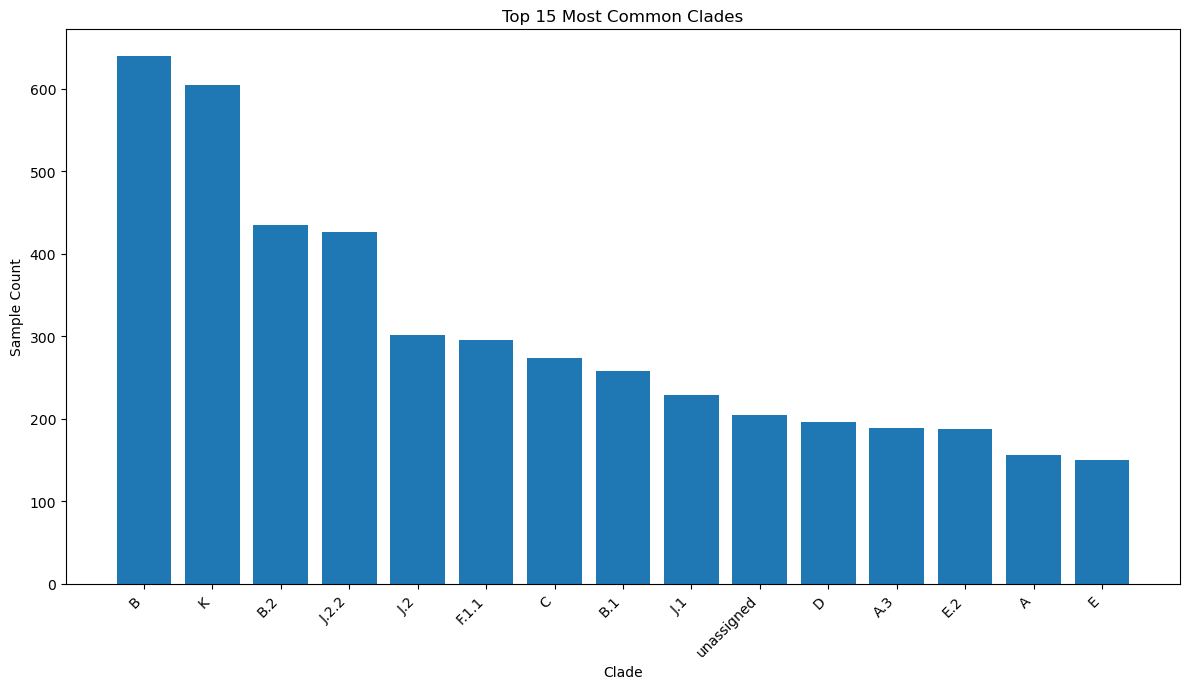

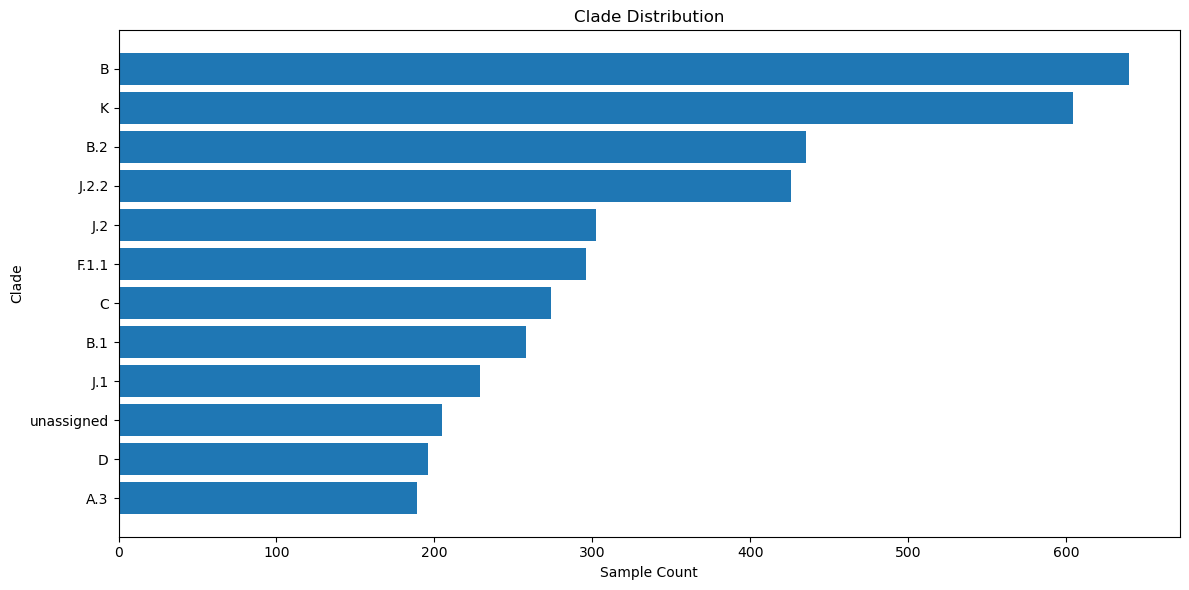

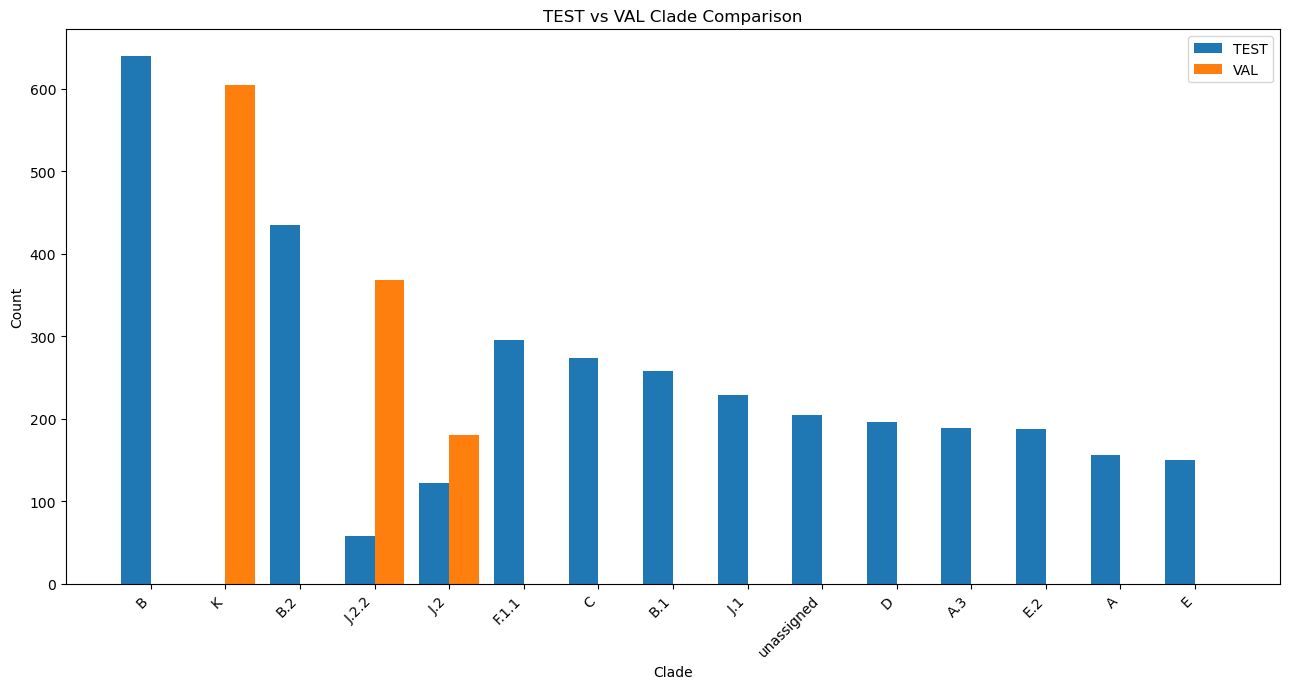


===== SUMMARY =====
Total samples: 5531
Unique clades: 43
Avg per clade: 128.63

Top 10 clades:
 1. B                  640 (11.57%)
 2. K                  604 (10.92%)
 3. B.2                435 ( 7.86%)
 4. J.2.2              426 ( 7.70%)
 5. J.2                302 ( 5.46%)
 6. F.1.1              296 ( 5.35%)
 7. C                  274 ( 4.95%)
 8. B.1                258 ( 4.66%)
 9. J.1                229 ( 4.14%)
10. unassigned         205 ( 3.71%)


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Clade Analysis - Matplotlib Bar Charts Version
==============================================

Replaces ASCII charts with real matplotlib bar charts.

Usage:
    python clade_matplot_charts.py
"""

import csv
from collections import defaultdict
import matplotlib.pyplot as plt


class CladeMatplotVisualizer:
    def __init__(self):
        pass

    def plot_top_clades(self, data, title="Top Clades", top_n=15):
        """Top clade bar chart"""
        if not data:
            print("No data")
            return

        sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)[:top_n]
        labels = [x[0] for x in sorted_data]
        values = [x[1] for x in sorted_data]

        plt.figure(figsize=(12, 7))
        plt.bar(labels, values)
        plt.title(title)
        plt.xlabel("Clade")
        plt.ylabel("Sample Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def plot_distribution(self, data, title="Clade Distribution", top_n=12):
        """Clade distribution bar chart"""
        if not data:
            print("No data")
            return

        sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)[:top_n]
        labels = [x[0] for x in sorted_data]
        values = [x[1] for x in sorted_data]

        plt.figure(figsize=(12, 6))
        plt.barh(labels, values)
        plt.title(title)
        plt.xlabel("Sample Count")
        plt.ylabel("Clade")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    def plot_test_vs_val(self, test_data, val_data, title="TEST vs VAL Comparison"):
        """Side-by-side comparison chart"""
        common = sorted(set(test_data.keys()) & set(val_data.keys()),
                        key=lambda x: test_data[x] + val_data[x],
                        reverse=True)[:15]

        if not common:
            print("No common clades")
            return

        test_vals = [test_data[c] for c in common]
        val_vals = [val_data[c] for c in common]

        x = range(len(common))
        width = 0.4

        plt.figure(figsize=(13, 7))
        plt.bar(x, test_vals, width=width, label="TEST")
        plt.bar([i + width for i in x], val_vals, width=width, label="VAL")

        plt.xticks([i + width / 2 for i in x], common, rotation=45, ha='right')
        plt.title(title)
        plt.xlabel("Clade")
        plt.ylabel("Count")
        plt.legend()
        plt.tight_layout()
        plt.show()


def read_clade_data():
    """Read CSV"""
    clade_data = defaultdict(int)
    test_data = defaultdict(int)
    val_data = defaultdict(int)

    try:
        with open('clade_distribution_summary.csv', 'r', encoding='utf-8') as f:
            reader = csv.DictReader(f)
            for row in reader:
                clade = row.get('Clade', '')
                if clade:
                    combined = int(row.get('Combined_Count', 0))
                    test = int(row.get('TEST_Count', 0))
                    val = int(row.get('VAL_Count', 0))

                    clade_data[clade] = combined
                    test_data[clade] = test
                    val_data[clade] = val

        return clade_data, test_data, val_data

    except Exception as e:
        print(f"Error: {e}")
        return None, None, None


def create_text_summary(clade_data):
    """Text stats"""
    print("\n===== SUMMARY =====")

    total = sum(clade_data.values())
    unique = len(clade_data)

    print(f"Total samples: {total}")
    print(f"Unique clades: {unique}")
    print(f"Avg per clade: {total/unique:.2f}")

    top = sorted(clade_data.items(), key=lambda x: x[1], reverse=True)[:10]

    print("\nTop 10 clades:")
    for i, (c, v) in enumerate(top, 1):
        pct = v / total * 100
        print(f"{i:2d}. {c:15s} {v:6d} ({pct:5.2f}%)")


def main():
    print("Loading data...")

    clade_data, test_data, val_data = read_clade_data()
    if not clade_data:
        print("No data")
        return

    print(f"Loaded {len(clade_data)} clades")

    vis = CladeMatplotVisualizer()

    # Top clade chart
    vis.plot_top_clades(
        clade_data,
        "Top 15 Most Common Clades"
    )

    # Distribution horizontal
    vis.plot_distribution(
        clade_data,
        "Clade Distribution"
    )

    # TEST vs VAL
    vis.plot_test_vs_val(
        test_data,
        val_data,
        "TEST vs VAL Clade Comparison"
    )

    # Text summary
    create_text_summary(clade_data)


if __name__ == "__main__":
    main()
